**Analyze the difference between original audio and different codec generated audios**

#python -m pip install -U scikit-image

Encodec:
Mean Squared Error (MSE): 138.83164978027344
Structural Similarity Index (SSIM): 0.451694097610507
Accuracy: 45.17%


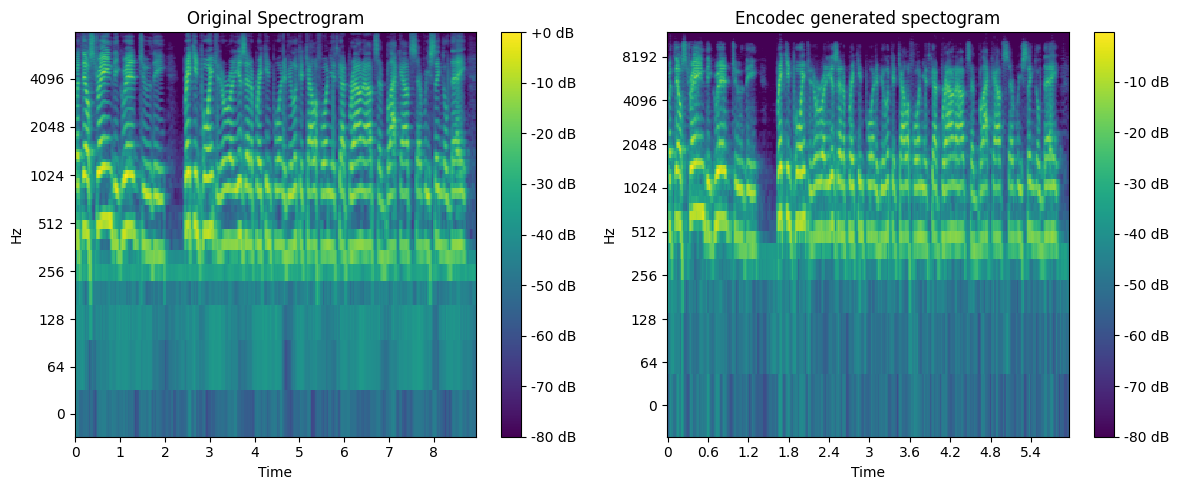

AcademiaCodec:
Mean Squared Error (MSE): 128.60247802734375
Structural Similarity Index (SSIM): 0.44843982600618465
Accuracy: 44.84%


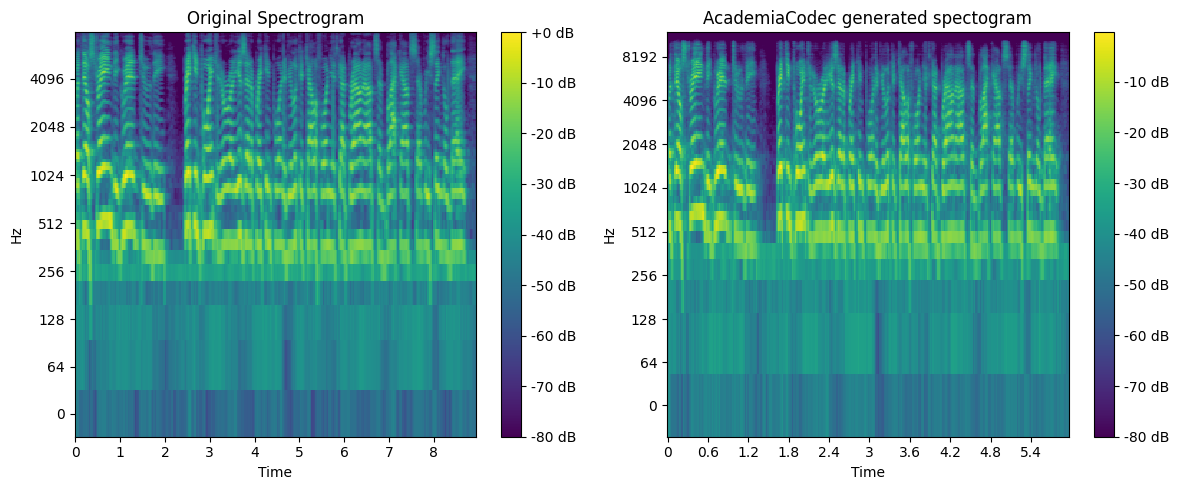

AudioDec Codec:
Mean Squared Error (MSE): 32.7303466796875
Structural Similarity Index (SSIM): 0.8200623854878651
Accuracy: 82.01%


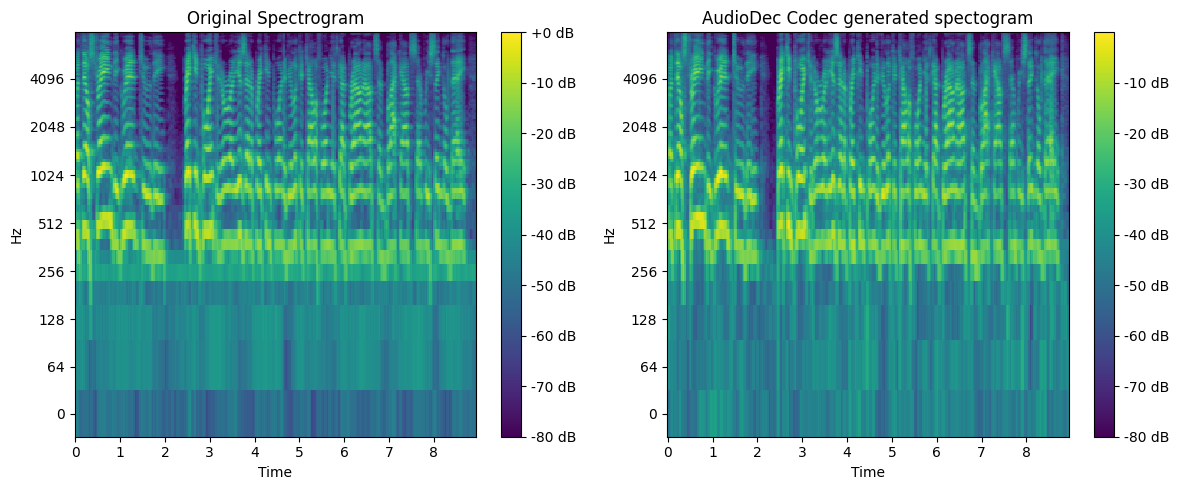

DAC Codec:
Mean Squared Error (MSE): 7.670432090759277
Structural Similarity Index (SSIM): 0.9392194039491114
Accuracy: 93.92%


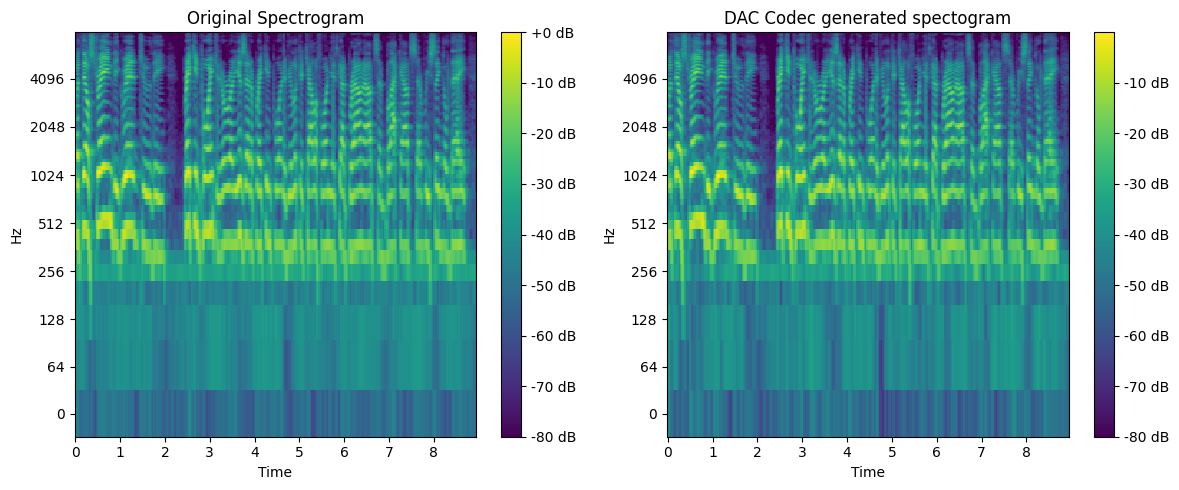

Speech Tokenizer:
Mean Squared Error (MSE): 18.733366012573242
Structural Similarity Index (SSIM): 0.8695311067139769
Accuracy: 86.95%


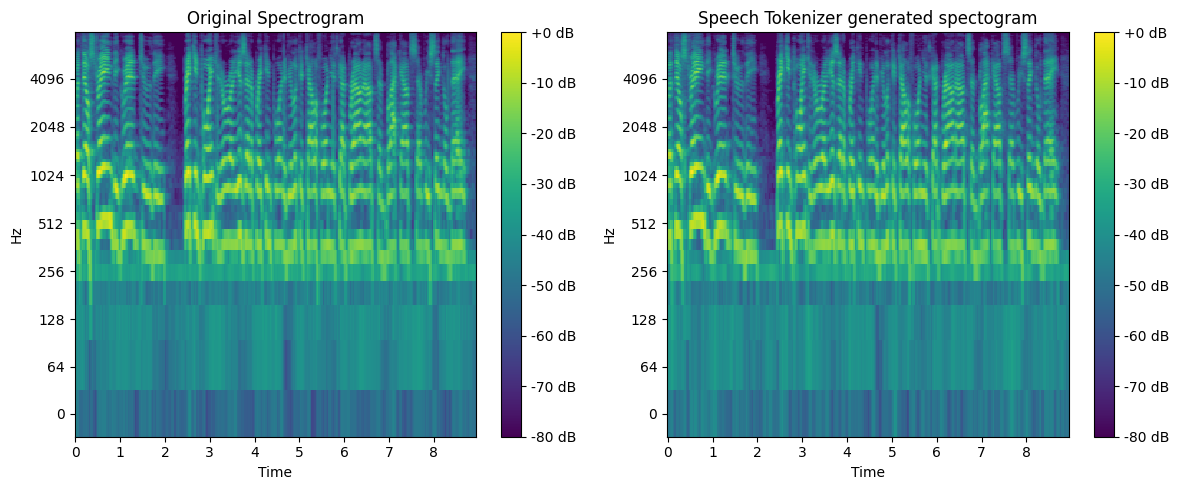

Funcodec:
Mean Squared Error (MSE): 11.187334060668945
Structural Similarity Index (SSIM): 0.9261222098597073
Accuracy: 92.61%


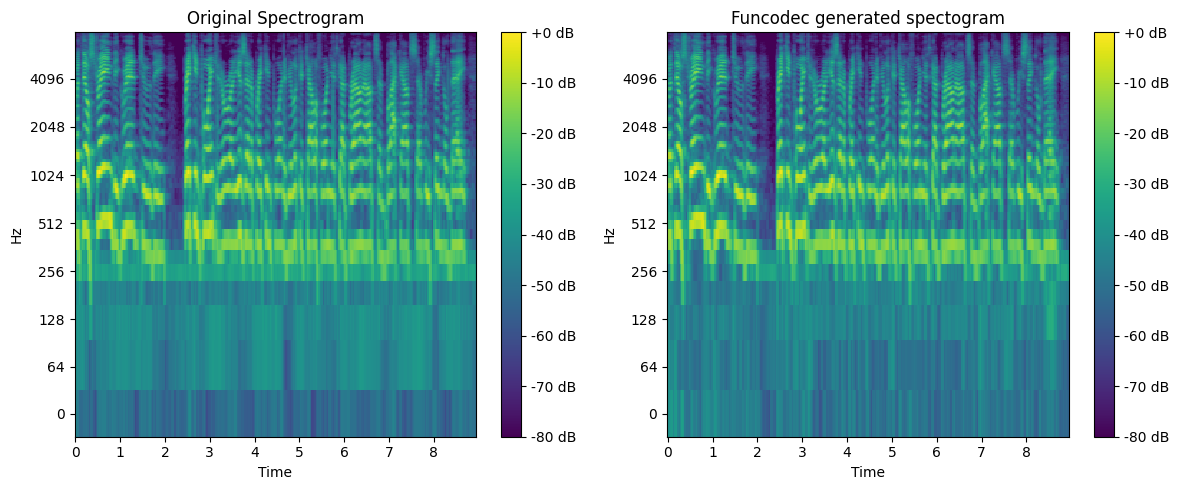

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import librosa
import librosa.display
from skimage.metrics import structural_similarity as ssim

def generate_spectrogram(wav_path):
    y, sr = librosa.load(wav_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB, sr

def compare_spectrograms(original_wav, generated_wav, title):
    # Generate spectrograms
    original, sr_orig = generate_spectrogram(original_wav)
    generated, sr_gen = generate_spectrogram(generated_wav)
    
    # Resize generated spectrogram to match original if dimensions are different
    if original.shape != generated.shape:
        generated = cv2.resize(generated, (original.shape[1], original.shape[0]))

    # Compute Mean Squared Error (MSE)
    mse = np.mean((original - generated) ** 2)
    
    # Compute Structural Similarity Index (SSIM)
    similarity = ssim(original, generated, data_range=original.max() - original.min())
    
    # Define accuracy based on similarity (SSIM range is -1 to 1, normalize it to 0-100%)
    accuracy = max(0, similarity) * 100
    
    print(f"{title}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Structural Similarity Index (SSIM): {similarity}")
    print(f"Accuracy: {accuracy:.2f}%")

    # Display spectrograms
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot original spectrogram
    ax = axs[0]
    img = librosa.display.specshow(original, sr=sr_orig, x_axis='time', y_axis='log', cmap='viridis', ax=ax)
    ax.set_title('Original Spectrogram')
    plt.colorbar(img, ax=ax, format='%+2.0f dB')

    # Plot generated spectrogram
    ax = axs[1]
    img = librosa.display.specshow(generated, sr=sr_gen, x_axis='time', y_axis='log', cmap='viridis', ax=ax)
    ax.set_title(f"{title} generated spectogram")
    plt.colorbar(img, ax=ax, format='%+2.0f dB')

    plt.tight_layout()
    plt.show()


# Encodec Spectogram comparision
compare_spectrograms(
    '/data/FF_V2/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/Original/Donald_Trump_00018.wav',
    '/data/FF_V2/codec_fake_data/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/encodec/Donald_Trump_00018_encodec.wav',
    "Encodec"
)


# AcademiaCodec Spectogram comparision
compare_spectrograms(
    '/data/FF_V2/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/Original/Donald_Trump_00018.wav',
    '/data/FF_V2/codec_fake_data/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/academic_codec/Donald_Trump_00018_academic_codec.wav',
    "AcademiaCodec"
)

# AudioDec Codec Spectogram comparision
compare_spectrograms(
    '/data/FF_V2/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/Original/Donald_Trump_00018.wav',
    '/data/FF_V2/codec_fake_data/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/audio_dec_codec/Donald_Trump_00018_audiodec_codec.wav',
    "AudioDec Codec"
)

# DAC Codec Spectogram comparision
compare_spectrograms(
    '/data/FF_V2/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/Original/Donald_Trump_00018.wav',
    '/data/FF_V2/codec_fake_data/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/dac/Donald_Trump_00018_dac_codec.wav',
    "DAC Codec"
)

# SpeechTokenizer Codec Spectogram comparision
compare_spectrograms(
    '/data/FF_V2/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/Original/Donald_Trump_00018.wav',
    '/data/FF_V2/codec_fake_data/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/speech_tokenizer/Donald_Trump_00018_speech_tokenizer.wav',
    "Speech Tokenizer"
)


# Funcodec Spectogram comparision
compare_spectrograms(
    '/data/FF_V2/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/Original/Donald_Trump_00018.wav',
    '/data/FF_V2/codec_fake_data/Famous_Figures_V2/Data/No_Laundering/no_laundering_s16/Donald_Trump_v2/train/funcodec/Donald_Trump_00018_funcodec.wav',
    "Funcodec"
)

